In [2]:
import re
import tweepy as tw
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
consumer_key= 'kyG7nrPdLSGPYPd8PZp2IU0og'
consumer_secret= 'Fu27Sd00fxc73MAkwgQVD7Tk9Xsg2HNqwFW0Aw5td61xGL0R6J'
access_token= '1215628395108691969-OqyJjhXkUR4PTe73LOkmQQDB2b0T5k'
access_token_secret= 'J8QtHKDbus0s7ivHVSbU0dkwLgZ68qgjSdyUntpw7WE0r'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)


In [5]:
posts=api.user_timeline(screen_name="JoeBiden",count=200,language="en",tweet_mode="extended")
print("Five recent tweets \n")
for tweet in posts[0:5]:
  print(tweet.full_text)
  print(tweet.created_at)

Five recent tweets 

We cannot fail the American people again.
https://t.co/Zm5dX7G225
2022-06-07 22:40:00
In 1994, Congress passed a bipartisan assault weapons ban. Nine categories of semi-automatic weapons were included, like AK-47s and AR-15s. 

In the 10 years it was law, mass shootings went down. After Republicans let the law expire in 2004, mass shootings tripled.
2022-06-07 18:13:02
Here's what the overwhelming majority of American people believe we must do.
https://t.co/u4MJuv6tCd
2022-06-07 15:45:04
Over the last two decades, more school-aged children have died from guns than on-duty police officers and active-duty military combined. Think about that. 

How much more carnage are we willing to accept? How many more innocent lives must be taken before we say enough?
2022-06-07 00:13:00
Thanks to the Bipartisan Infrastructure Law, we're making critical investments in our climate and physical infrastructure to help increase our nation's climate resilience—from beginning to replace

In [6]:
d={'Tweets': [tweet.full_text for tweet in posts],'Time-Stamp':[tweet.created_at for tweet in posts],'Retweets':[tweet.retweet_count for tweet in posts]}
df=pd.DataFrame(d)
df.head()

,Tweets,Time-Stamp,Retweets
0,We cannot fail the American people again.\nhtt...,2022-06-07 22:40:00,1371
1,"In 1994, Congress passed a bipartisan assault ...",2022-06-07 18:13:02,4781
2,Here's what the overwhelming majority of Ameri...,2022-06-07 15:45:04,1305
3,"Over the last two decades, more school-aged ch...",2022-06-07 00:13:00,6497
4,"Thanks to the Bipartisan Infrastructure Law, w...",2022-06-06 22:49:00,1478


In [7]:
df['Date']=[d.date() for d in df['Time-Stamp']]
df['Time']=[d.time() for d in df['Time-Stamp']]

df

,Tweets,Time-Stamp,Retweets,Date,Time
0,We cannot fail the American people again.\nhtt...,2022-06-07 22:40:00,1371,2022-06-07,22:40:00
1,"In 1994, Congress passed a bipartisan assault ...",2022-06-07 18:13:02,4781,2022-06-07,18:13:02
2,Here's what the overwhelming majority of Ameri...,2022-06-07 15:45:04,1305,2022-06-07,15:45:04
3,"Over the last two decades, more school-aged ch...",2022-06-07 00:13:00,6497,2022-06-07,00:13:00
4,"Thanks to the Bipartisan Infrastructure Law, w...",2022-06-06 22:49:00,1478,2022-06-06,22:49:00
...,...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2022-03-16 14:18:00,2271,2022-03-16,14:18:00
196,"There are over 200,000 kids in America and man...",2022-03-16 00:36:00,7266,2022-03-16,00:36:00
197,Not only has Infrastructure Week finally arriv...,2022-03-15 17:10:01,2512,2022-03-15,17:10:01
198,RT @POTUS: My Administration is committed to c...,2022-03-15 14:21:30,2168,2022-03-15,14:21:30


In [8]:
df=df.drop('Time-Stamp',axis=1)
df


,Tweets,Retweets,Date,Time
0,We cannot fail the American people again.\nhtt...,1371,2022-06-07,22:40:00
1,"In 1994, Congress passed a bipartisan assault ...",4781,2022-06-07,18:13:02
2,Here's what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04
3,"Over the last two decades, more school-aged ch...",6497,2022-06-07,00:13:00
4,"Thanks to the Bipartisan Infrastructure Law, w...",1478,2022-06-06,22:49:00
...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00
196,"There are over 200,000 kids in America and man...",7266,2022-03-16,00:36:00
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01
198,RT @POTUS: My Administration is committed to c...,2168,2022-03-15,14:21:30


In [9]:
def clean_tweets(text):
  text=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\s+)|(https)"," ",text)
  return text
df['Tweets']=df['Tweets'].apply(clean_tweets)
df

,Tweets,Retweets,Date,Time
0,We cannot fail the American people again ...,1371,2022-06-07,22:40:00
1,In 1994 Congress passed a bipartisan assault ...,4781,2022-06-07,18:13:02
2,Here s what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04
3,Over the last two decades more school aged ch...,6497,2022-06-07,00:13:00
4,Thanks to the Bipartisan Infrastructure Law w...,1478,2022-06-06,22:49:00
...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00
196,There are over 200 000 kids in America and man...,7266,2022-03-16,00:36:00
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01
198,RT My Administration is committed to closin...,2168,2022-03-15,14:21:30


In [10]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
df

,Tweets,Retweets,Date,Time,Month,Day
0,We cannot fail the American people again ...,1371,2022-06-07,22:40:00,6,7
1,In 1994 Congress passed a bipartisan assault ...,4781,2022-06-07,18:13:02,6,7
2,Here s what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04,6,7
3,Over the last two decades more school aged ch...,6497,2022-06-07,00:13:00,6,7
4,Thanks to the Bipartisan Infrastructure Law w...,1478,2022-06-06,22:49:00,6,6
...,...,...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00,3,16
196,There are over 200 000 kids in America and man...,7266,2022-03-16,00:36:00,3,16
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01,3,15
198,RT My Administration is committed to closin...,2168,2022-03-15,14:21:30,3,15


In [11]:
#creating a function to check subjectivity of tweets
def get_tweet_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

df['Subjectivity']=df['Tweets'].apply(get_tweet_subjectivity)

df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity
0,We cannot fail the American people again ...,1371,2022-06-07,22:40:00,6,7,0.150000
1,In 1994 Congress passed a bipartisan assault ...,4781,2022-06-07,18:13:02,6,7,0.288889
2,Here s what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04,6,7,0.500000
3,Over the last two decades more school aged ch...,6497,2022-06-07,00:13:00,6,7,0.465152
4,Thanks to the Bipartisan Infrastructure Law w...,1478,2022-06-06,22:49:00,6,6,0.460714
...,...,...,...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00,3,16,0.950000
196,There are over 200 000 kids in America and man...,7266,2022-03-16,00:36:00,3,16,0.466667
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01,3,15,0.700000
198,RT My Administration is committed to closin...,2168,2022-03-15,14:21:30,3,15,0.575000


In [12]:
#creating a function to check polarity of tweets
def get_tweet_polarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity']=df['Tweets'].apply(get_tweet_polarity)
df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity,Polarity
0,We cannot fail the American people again ...,1371,2022-06-07,22:40:00,6,7,0.150000,-0.250000
1,In 1994 Congress passed a bipartisan assault ...,4781,2022-06-07,18:13:02,6,7,0.288889,-0.155556
2,Here s what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04,6,7,0.500000,0.250000
3,Over the last two decades more school aged ch...,6497,2022-06-07,00:13:00,6,7,0.465152,0.219697
4,Thanks to the Bipartisan Infrastructure Law w...,1478,2022-06-06,22:49:00,6,6,0.460714,0.141667
...,...,...,...,...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00,3,16,0.950000,0.600000
196,There are over 200 000 kids in America and man...,7266,2022-03-16,00:36:00,3,16,0.466667,0.283333
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01,3,15,0.700000,0.000000
198,RT My Administration is committed to closin...,2168,2022-03-15,14:21:30,3,15,0.575000,0.350000


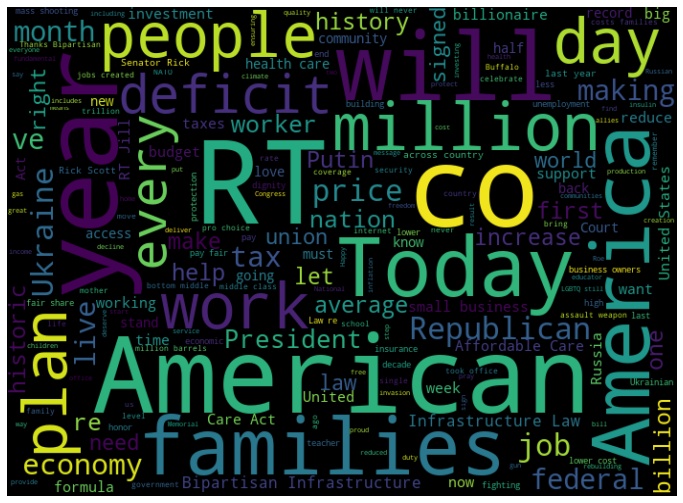

In [13]:
#what word appeared the maximum times
all_words=' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width= 700,height= 500, random_state= 30,max_font_size= 119).generate(all_words)
plt.figure(figsize=(12,9))
plt.imshow(wordCloud, interpolation="bilinear",aspect='auto')
plt.axis('off')
plt.show()

In [14]:
#creating a function to get analysis - positive, negative and neutral moods of the tweets
def get_tweet_analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(get_tweet_analysis)
df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity,Polarity,Analysis
0,We cannot fail the American people again ...,1371,2022-06-07,22:40:00,6,7,0.150000,-0.250000,Negative
1,In 1994 Congress passed a bipartisan assault ...,4781,2022-06-07,18:13:02,6,7,0.288889,-0.155556,Negative
2,Here s what the overwhelming majority of Ameri...,1305,2022-06-07,15:45:04,6,7,0.500000,0.250000,Positive
3,Over the last two decades more school aged ch...,6497,2022-06-07,00:13:00,6,7,0.465152,0.219697,Positive
4,Thanks to the Bipartisan Infrastructure Law w...,1478,2022-06-06,22:49:00,6,6,0.460714,0.141667,Positive
...,...,...,...,...,...,...,...,...,...
195,The Bipartisan Government Funding Bill include...,2271,2022-03-16,14:18:00,3,16,0.950000,0.600000,Positive
196,There are over 200 000 kids in America and man...,7266,2022-03-16,00:36:00,3,16,0.466667,0.283333,Positive
197,Not only has Infrastructure Week finally arriv...,2512,2022-03-15,17:10:01,3,15,0.700000,0.000000,Neutral
198,RT My Administration is committed to closin...,2168,2022-03-15,14:21:30,3,15,0.575000,0.350000,Positive


In [15]:
#getting all the positive tweets
ptweets=df[df.Analysis =='Positive']
ptweets=ptweets['Tweets']

ptweets

2      Here s what the overwhelming majority of Ameri...
3      Over the last two decades  more school aged ch...
4      Thanks to the Bipartisan Infrastructure Law  w...
5      In Buffalo and Uvalde  I spent hours with fami...
6      RT    In Texas  you can be 18 years old and bu...
                             ...                        
194    Today we celebrate the deep affection we have ...
195    The Bipartisan Government Funding Bill include...
196    There are over 200 000 kids in America and man...
198    RT    My Administration is committed to closin...
199    As my mother would say   God love them       t...
Name: Tweets, Length: 121, dtype: object

In [16]:
#getting all the negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

ntweets

0      We cannot fail the American people again      ...
1      In 1994  Congress passed a bipartisan assault ...
16     RT    Tonight  I m addressing the nation on th...
24     RT    On Sunday  Jill and I are traveling to U...
29     To lose a child is to have a piece of your sou...
31     RT    I m addressing the nation on the horrifi...
35     Under my predecessor  the deficit increased ev...
36     Right now  the average billionaire there are a...
41     In America  evil will not win  I promise you  ...
45     A plan by Republican Senator Rick Scott would ...
51     RT    Jill and I will travel to Buffalo on Tue...
59     Senator Rick Scott s ultra MAGA agenda could r...
60     RT    In remembrance of today s tragic milesto...
65     I encourage Congressional Republicans to join ...
70     The Republican plan led by Senator Rick Scott ...
73     My plan to reduce the deficit would help reduc...
84     The Republican proposal  led by Senator Rick S...
88     Just as Putin chose to l

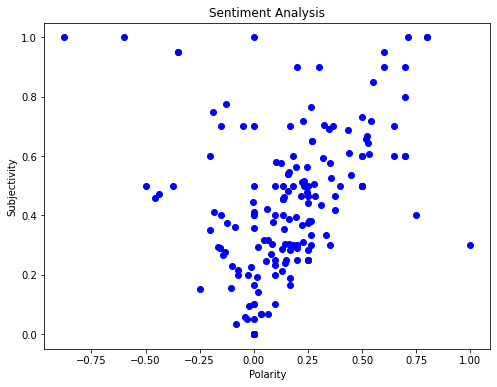

In [17]:
#Visualizing the overall sentiments of the tweets
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
#percentage of positive tweets
print("Percentage of positive tweets: ", ptweets.shape[0]/df.shape[0]*100,"%")

Percentage of positive tweets:  60.5 %


In [19]:
#percentage of negative tweets
print("Percentage of negative tweets: ", ntweets.shape[0]/df.shape[0]*100,"%")

Percentage of negative tweets:  17.5 %


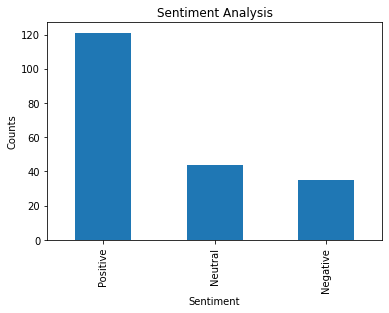

In [20]:
#Categorizing the tweets into positive, negative and neutral
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()